In [1]:
import pathlib

import pandas as pd
import seaborn as sns

In [2]:
bird_ids = [
    'bk13bk12',
    'bk17bk30',
    'bk1bk3',
    'bk1bk9',
]

In [9]:
cd /home/pimienta/Documents/repos/coding/vocalpy/songdkl

/home/pimienta/Documents/repos/coding/vocalpy/songdkl


In [10]:
generated_test_data_dir = pathlib.Path(f'./tests/data-for-tests/generated/')
syl_count_txts = sorted(generated_test_data_dir.glob('*syl-counts.txt'))

In [17]:
syl_count_txts

[PosixPath('tests/data-for-tests/generated/pcb-script-syl-counts.txt'),
 PosixPath('tests/data-for-tests/generated/py-pkg-otsu-syl-counts.txt'),
 PosixPath('tests/data-for-tests/generated/py-pkg-syl-counts.txt')]

In [26]:
data = []

for syl_count_txt in syl_count_txts:
    df = pd.read_csv(syl_count_txt, sep='\t', header=None)
    df.columns = ['Bird ID', 'Num. syllables']
    if 'py-pkg' in syl_count_txt.name:
        df['Bird ID'] = df['Bird ID'].map(lambda str_: str_.split('/')[-2])
    df = df.iloc[:4,:] # don't keep any repeats
    source = '-'.join(syl_count_txt.name.split('-')[:-2])
    df['source'] = source
    data.append(df)

data = pd.concat(data)

In [27]:
data

,Bird ID,Num. syllables,source
0,bk13bk12,7,pcb-script
1,bk17bk30,14,pcb-script
2,bk1bk3,8,pcb-script
3,bk1bk9,5,pcb-script
0,bk13bk12,11,py-pkg-otsu
1,bk17bk30,17,py-pkg-otsu
2,bk1bk3,8,py-pkg-otsu
3,bk1bk9,7,py-pkg-otsu
0,bk13bk12,11,py-pkg
1,bk17bk30,20,py-pkg


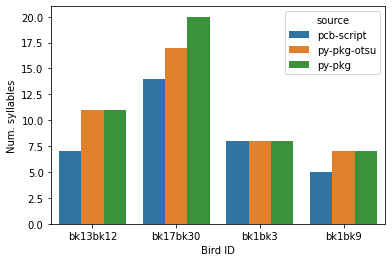

In [29]:
sns.barplot(
    data=data,
    x='Bird ID',
    y='Num. syllables',
    hue='source'
);